In [1]:
# Importando a base
import pandas as pd
pd.set_option('display.max_columns',85)
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,-1,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,-1,-1,-1,0,9,2008,WD,Normal,223500


In [2]:
# Podemos verificar novamente as informações dessa base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
# E também a quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     44
int64      34
float64     3
Name: count, dtype: int64

In [4]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

In [5]:
# Visualizando a descrição estatística
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

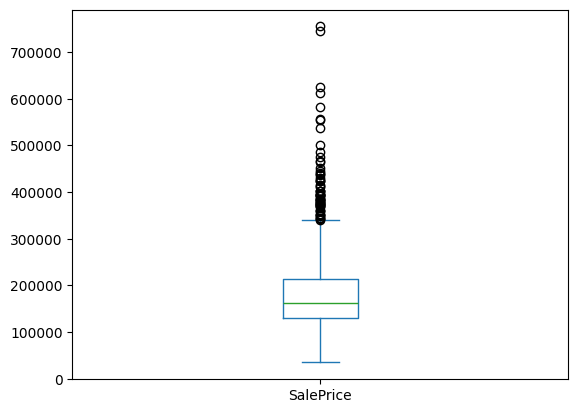

In [6]:
# Visualizando um boxplot
treino.SalePrice.plot.box();

In [7]:
# Verificando a correlação entre os valores
treino.corr(numeric_only=True)['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

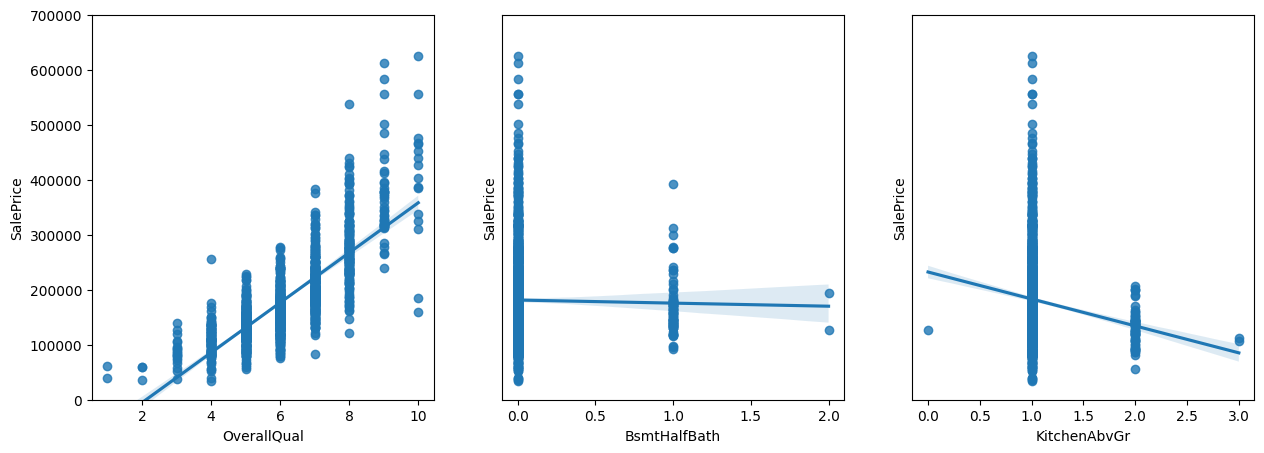

In [8]:
# Criando esse gráfico
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.regplot(data=treino,x='OverallQual',y='SalePrice',ax=ax[0])
sns.regplot(data=treino,x='BsmtHalfBath',y='SalePrice',ax=ax[1])
sns.regplot(data=treino,x='KitchenAbvGr',y='SalePrice',ax=ax[2])

ax[0].set(ylim=(0,700000))
ax[1].set(ylim=(0,700000),yticks=[])
ax[2].set(ylim=(0,700000),yticks=[])

plt.show()

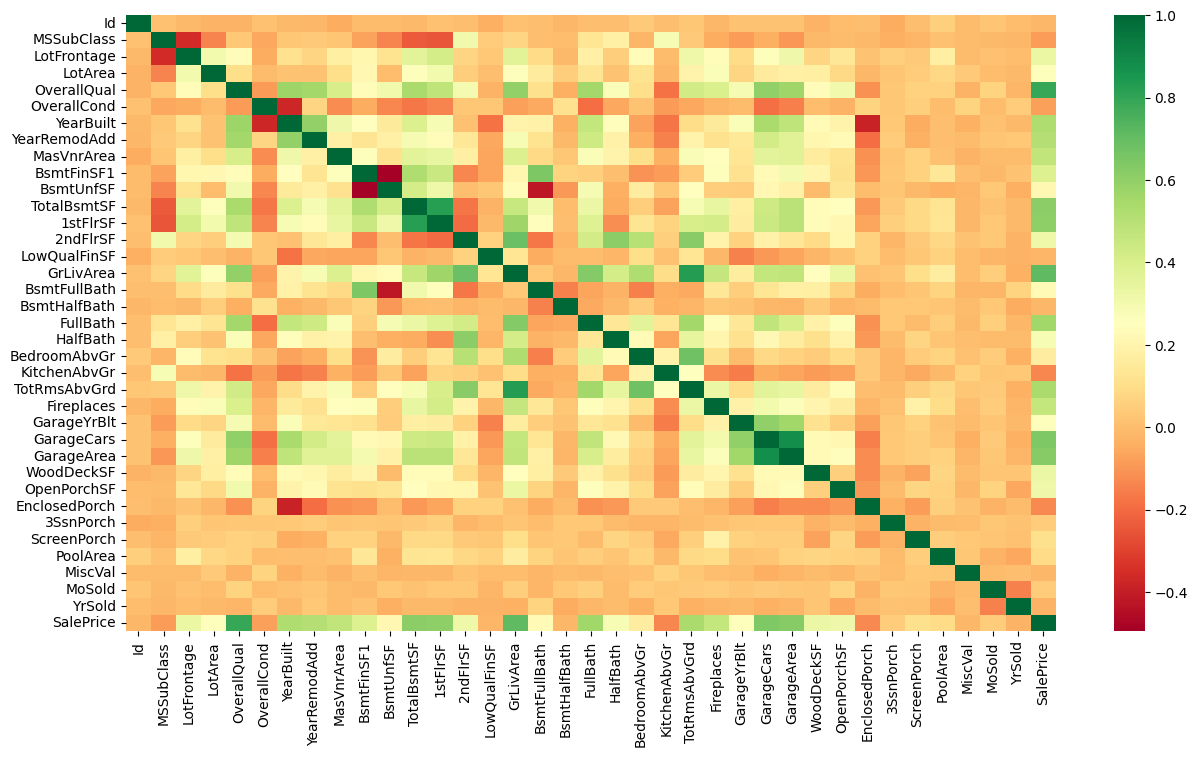

In [9]:
# Criando um mapa de calor da correlação
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(treino.corr(numeric_only=True),cmap='RdYlGn')

plt.show()

- **E para as variáveis categóricas, podemos analisar se alguma delas possuem valores recorrentes**
    - Por exemplo, todas as casas "caras" possuem ar condicionado central e as casas "baratas" não

In [10]:
# Selecionando as colunas que vamos trabalhar
obj_cols = treino.columns[treino.dtypes == 'object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
# Visualizando as casas mais caras
caras = treino.sort_values('SalePrice').tail(10)
caras = caras[obj_cols]
caras.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Hip,CompShg,VinylSd,VinylSd,Stone,Ex,TA,PConc,Ex,TA,No,Unf,Unf,0,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Ex,TA,PConc,Ex,TA,No,GLQ,Unf,0,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial


In [12]:
# E também as casas mais baratas
baratas = treino.sort_values('SalePrice').head(10)
baratas = baratas[obj_cols]
baratas.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,CBlock,TA,TA,No,Rec,Unf,0,GasA,TA,N,FuseA,TA,Typ,-1,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,AsbShng,AsbShng,NaN,TA,TA,CBlock,TA,TA,Av,BLQ,Unf,0,GasA,TA,N,FuseA,TA,Typ,-1,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml


In [13]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val = caras.nunique()
caras_val.head(2)

MSZoning    1
Street      1
dtype: int64

In [14]:
# Verificando agora para as casas mais baratas
baratas_val = baratas.nunique()
baratas_val.head(2)

MSZoning    3
Street      2
dtype: int64

In [15]:
# Podemos unir esses valores
rep = pd.concat([caras_val,baratas_val],axis=1).sort_values([0,1]).head(10)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [16]:
# Agora visualizando essas colunas para as casas mais caras
caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL


In [17]:
# E para as mais baratas
baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all)
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all)
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all)
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all)


<a id="colunas"></a>
## Agora podemos investigar melhor essas principais colunas
- **Index:**
    - [Utilities](#Utilities)
    - [CentralAir](#CentralAir)
    - [PavedDrive](#PavedDrive)
    - [MSZoning](#MSZoning)
    - [GarageQual](#GarageQual)

<a id="Utilities"></a>
- <font color="blue">**Vamos começar primeiramente analisando a coluna "Utilities"**</font>

In [18]:
# Verificando os valores nessa coluna para a base de treino
treino.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [19]:
# E para a base de teste
teste.Utilities.value_counts()

Utilities
AllPub    1459
Name: count, dtype: int64

In [20]:
# Eliminando essa coluna nas 2 bases
treino = treino.drop('Utilities',axis=1)
teste = teste.drop('Utilities',axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="CentralAir"></a>
- <font color="blue">**Analisando a coluna "CentralAir"**</font>

In [21]:
# Verificando os valores nessa coluna
treino.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [22]:
treino.CentralAir

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object

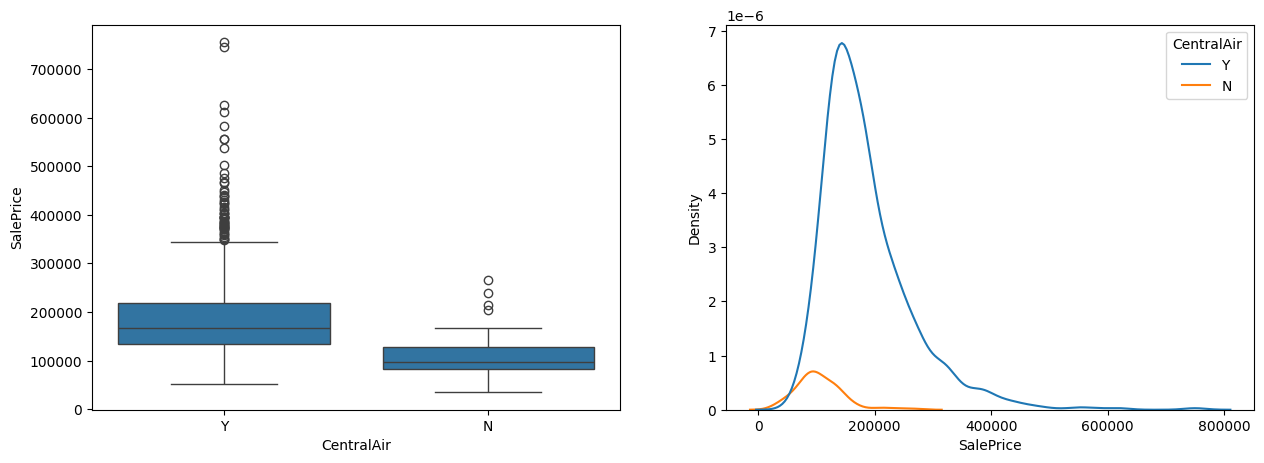

In [23]:
# Visualizando a relação com o preço
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino.CentralAir,y=treino.SalePrice,ax=ax[0])
sns.kdeplot(data=treino,x='SalePrice',hue='CentralAir',ax=ax[1])

plt.show()

- O valor "N", apesar de aparecer na maioria das casas de menor valor, não é um valor tão frequente

- **Podemos transformar essa coluna simplesmente colocando tudo que for Y como 1 e N como 0**

In [24]:
# Substituindo os valores
treino['CentralAirCheck'] = treino['CentralAir']
treino['CentralAir'] = treino.CentralAir.apply(lambda x: 1 if x == "Y" else 0)

In [25]:
# Verificando o resultado
treino[['CentralAirCheck','CentralAir']].value_counts()

CentralAirCheck  CentralAir
Y                1             1365
N                0               95
Name: count, dtype: int64

In [26]:
# Agora podemos apagar a coluna Check
treino = treino.drop('CentralAirCheck',axis=1)

- Fazendo o mesmo para a **<font color='blue'>base de teste</font>**

In [27]:
# Aplicando a função na base de teste
teste['CentralAir'] = teste.CentralAir.apply(lambda x: 1 if x == "Y" else 0)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="PavedDrive"></a>
- <font color="blue">**E também analisar a coluna "PavedDrive"** (calçada pavimentada)</font>
    - Y: Paved 
    - P: Partial Pavement
    - N: Dirt/Gravel

In [28]:
# Verificando os valores nessa coluna
treino.PavedDrive.value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

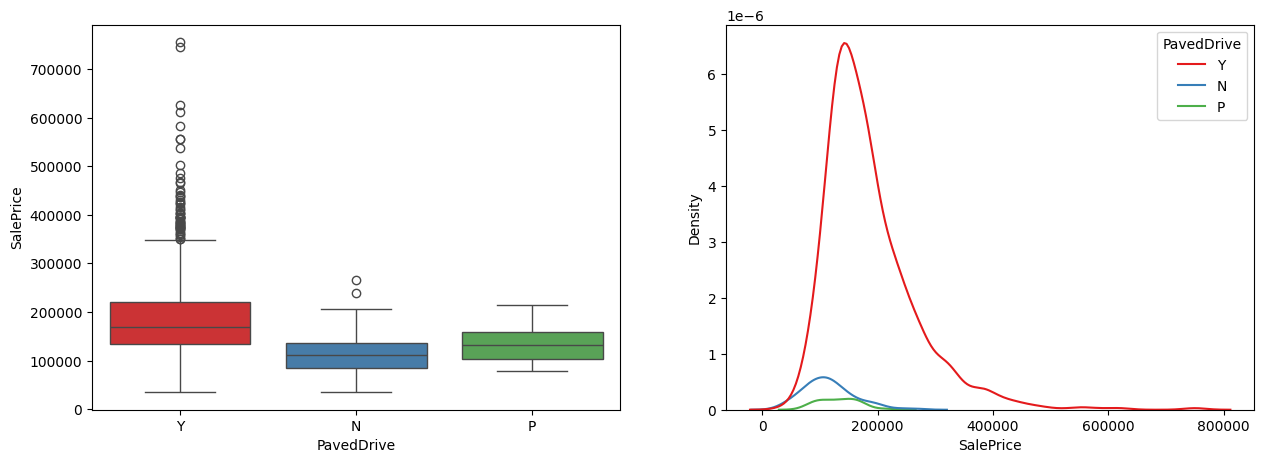

In [29]:
# Verificando a relação desses valores com o preço da casa
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(data =treino, x='PavedDrive',y='SalePrice',hue='PavedDrive',palette='Set1',ax=ax[0])
sns.kdeplot(data=treino,x='SalePrice',hue='PavedDrive',palette='Set1',ax=ax[1])

plt.show()

- **Podemos criar uma função capaz de transformar esses valores de texto em números**

In [30]:
# Criando a função
def DefinePavedDrive(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5
    else:
        return -1

In [31]:
# Aplicando essa função
treino['PavedDriveCheck'] = treino['PavedDrive']
treino['PavedDrive'] = treino.PavedDrive.apply(DefinePavedDrive)

In [32]:
# Verificando o resultado
treino[['PavedDriveCheck','PavedDrive']].value_counts()

PavedDriveCheck  PavedDrive
Y                1.0           1340
N                0.0             90
P                0.5             30
Name: count, dtype: int64

In [33]:
# Agora podemos apagar a coluna Check
treino = treino.drop('PavedDriveCheck',axis=1)

- E para a **<font color='blue'>base de teste</font>**

In [34]:
# Fazendo para a base de teste
teste['PavedDrive'] = teste.PavedDrive.apply(DefinePavedDrive)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="MSZoning"></a>
- <font color="blue">**Agora podemos entender a relação do "MSZoning" com o preço**</font>

In [35]:
# Fazendo um groupby desses dados para ver a média
treino.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [36]:
# Visualizando também mínimo, máximo e contagem
treino.groupby('MSZoning')['SalePrice'].agg(['mean','min','max','count','median'])

,mean,min,max,count,median
MSZoning,,,,,
C (all),74528.000000,34900,133900,10,74700.0
FV,214014.061538,144152,370878,65,205950.0
RH,131558.375000,76000,200000,16,136500.0
RL,191004.994787,39300,755000,1151,174000.0
RM,126316.830275,37900,475000,218,120500.0


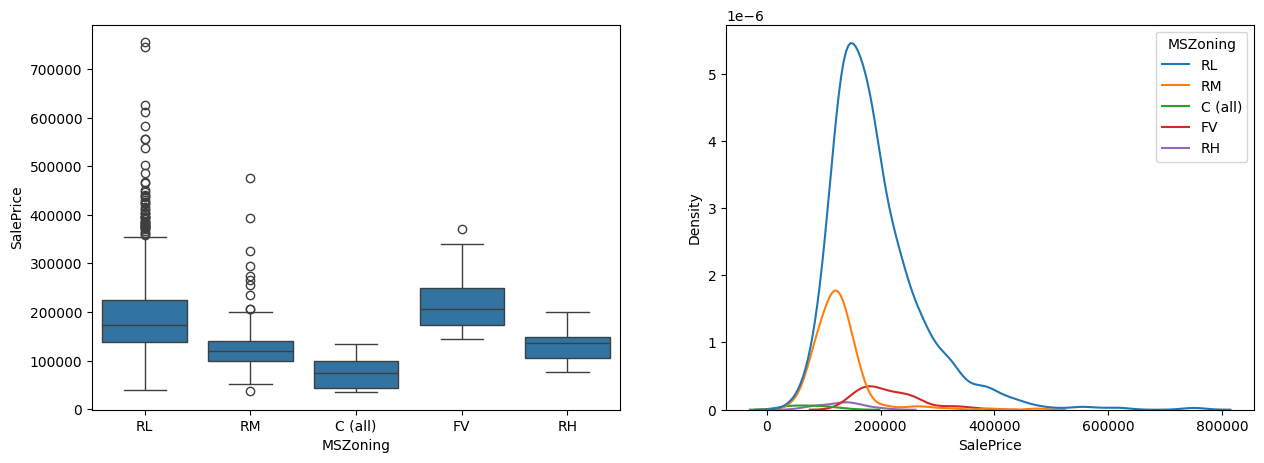

In [37]:
# Podemos inclusive visualizar a distribuição desses valores
coluna = 'MSZoning'

fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino.MSZoning,y=treino.SalePrice,ax=ax[0])
sns.kdeplot(data=treino,x='SalePrice',hue='MSZoning',ax=ax[1])

plt.show()

- **Para resolver o problema de variáveis textuais, podemos utilizar agora o OneHotEncoder e transformar cada um desses valores em uma nova coluna**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [38]:
# Importando
from sklearn.preprocessing import OneHotEncoder

In [39]:
# Criando o encoder para essa coluna
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')

In [40]:
# Fazendo o fit com os dados
ohe_MSZoning = ohe_MSZoning.fit(treino[['MSZoning']])

In [41]:
# Transformando os dados
ohe_MSZoning.transform(treino[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
# Podemos transformar isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(treino[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [43]:
# Unindo essa coluna com a base
treino = pd.concat([treino,ohe_MSZoning_df],axis=1)

In [44]:
# Verificando o resultado
treino.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.000000,8450,Pave,-1,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,-1,Attchd,2003.0,RFn,2,548,TA,TA,1.0,0,61,0,0,0,0,-1,-1,-1,0,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.000000,9600,Pave,-1,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,1.0,298,0,0,0,0,0,-1,-1,-1,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.000000,11250,Pave,-1,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,1.0,0,42,0,0,0,0,-1,-1,-1,0,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.000000,9550,Pave,-1,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,1.0,0,35,272,0,0,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.000000,14260,Pave,-1,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,1.0,192,84,0,0,0,0,-1,-1,-1,0,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0
5,6,50,RL,85.000000,14115,Pave,-1,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,1,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,-1,Attchd,1993.0,Unf,2,480,TA,TA,1.0,40,30,0,320,0,0,-1,MnPrv,Shed,700,10,2009,WD,Normal,143000,0.0,0.0,0.0,1.0,0.0
6,7,20,RL,75.000000,10084,Pave,-1,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,1,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,1.0,255,57,0,0,0,0,-1,-1,-1,0,8,2007,WD,Normal,307000,0.0,0.0,0.0,1.0,0.0
7,8,60,RL,84.039801,10382,Pave,-1,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,1,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,1.0,235,204,228,0,0,0,-1,-1,Shed,350,11,2009,WD,Normal,200000,0.0,0.0,0.0,1.0,0.0
8,9,50,RM,51.000000,6120,Pave,-1,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,1,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,1.0,90,0,205,0,0,0,-1,-1,-1,0,4,2008,WD,Abnorml,129900,0.0,0.0,0.0,0.0,

In [45]:
# Eliminando a coluna "MSZoning"
treino = treino.drop('MSZoning',axis=1)

- Agora utilizando o mesmo encoder para a **<font color='blue'>base de teste</font>**

In [46]:
# Fazendo a transformação
ohe_MSZoning.transform(teste[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
# Transformando em um DataFrame (podemos sobrescrever essa variável)
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(teste[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [48]:
# Unindo essa coluna com a base de teste
teste = pd.concat([teste,ohe_MSZoning_df],axis=1)

In [49]:
# Verificando o resultado
teste.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,RH,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,-1,Attchd,1961.0,Unf,1.0,730.0,TA,TA,1.0,140,0,0,0,120,0,-1,MnPrv,-1,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0
1,1462,20,RL,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,-1,Attchd,1958.0,Unf,1.0,312.0,TA,TA,1.0,393,36,0,0,0,0,-1,-1,Gar2,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
2,1463,60,RL,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,1.0,212,34,0,0,0,0,-1,MnPrv,-1,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
3,1464,60,RL,78.0,9978,Pave,-1,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,1.0,360,36,0,0,0,0,-1,-1,-1,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
4,1465,120,RL,43.0,5005,Pave,-1,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,-1,Attchd,1992.0,RFn,2.0,506.0,TA,TA,1.0,0,82,0,0,144,0,-1,-1,-1,0,1,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0


In [50]:
# Eliminando a coluna "MSZoning"
teste = teste.drop('MSZoning',axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="GarageQual"></a>
- <font color="blue">**Analisando as informações sobre garagem, começando pela "GarageQual"**</font>
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage -> lembrando que já substituimos esse valor por -1

In [51]:
# Verificando os valores nessa coluna
treino.GarageQual.value_counts()

GarageQual
TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

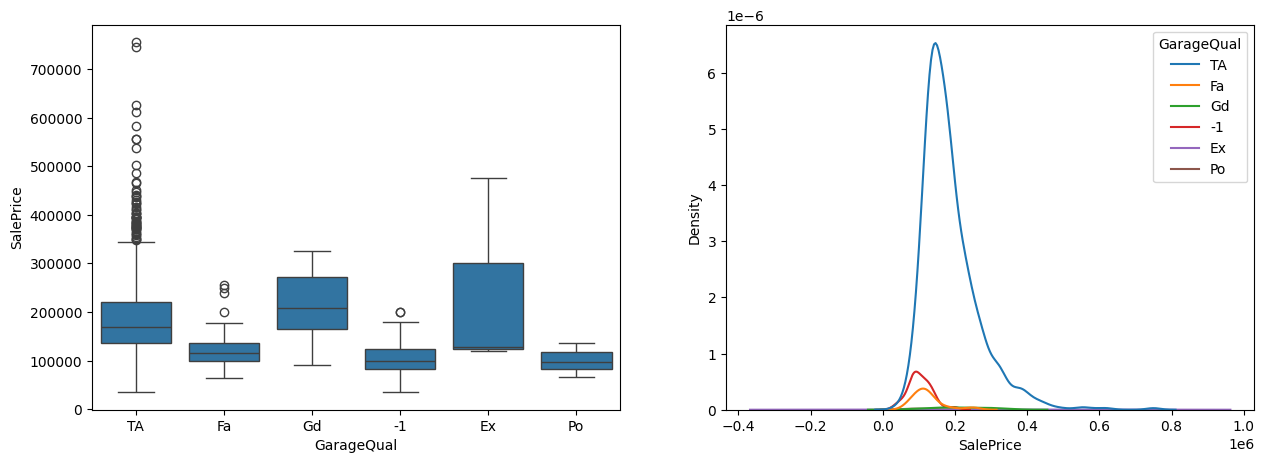

In [52]:
# Visualizando graficamente
coluna = 'GarageQual'

fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino[coluna],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(data=treino,x='SalePrice',hue='GarageQual',ax=ax[1]) 

plt.show()

- **Ao ir no arquivo data_description, percebemos que existem várias colunas de garagem (também percebemos isso na etapa de Data Cleaning), então podemos visualizar essas informações**

In [53]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [54]:
# Visualizando os valores nessa base
treino[cols_garagem].head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [55]:
# Fazendo o value_counts das colunas de Qualidade e Condição
treino[['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
Name: count, dtype: int64

In [56]:
# Contando em quantas colunas temos GarageQual == GarageCond
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

- **Podemos apagar a coluna "GarageCond" pois a informação nessa coluna diz basicamente a mesma coisa que a coluna "GarageQual"** 

In [57]:
# Apagando a coluna GarageCond
treino = treino.drop('GarageCond',axis=1)

- **Da mesma forma, também podemos analisar a relação entre "GarageCars" e "GarageArea"**

In [58]:
# Analisando a correlação entre as duas colunas e o preço
treino[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


# Eliminando a coluna GarageArea
treino = treino.drop('GarageArea',axis=1)

In [59]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual'],
      dtype='object')

- **Podemos continuar tratando as colunas de garagem, mas relacionando com outras informações da base como "YearBuilt" e "YearRemodAdd"**

In [60]:
# Analisando a correlação entre as datas de construção
treino[['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.272009,0.146341,0.261354
YearBuilt,0.272009,1.000000,0.592855,0.522897
YearRemodAdd,0.146341,0.592855,1.000000,0.507101
SalePrice,0.261354,0.522897,0.507101,1.000000


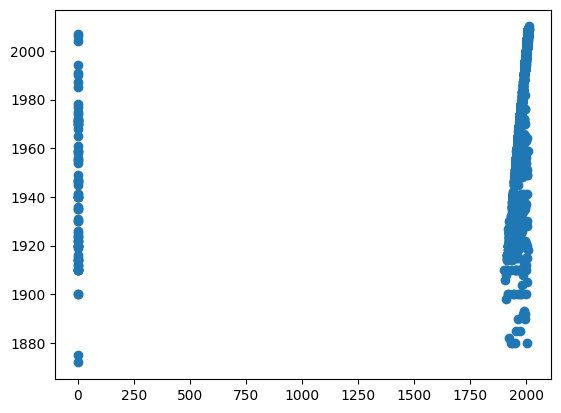

In [61]:
# Visualizando graficamente a correlação entre GarageYrBlt e YearBuilt
fig, ax = plt.subplots()

ax.scatter(treino.GarageYrBlt,treino.YearBuilt)

plt.show()

In [62]:
# Retirando da base os valores onde o ano é -1 (sem garagem)
treino.loc[treino.GarageYrBlt != -1,['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


In [63]:
# Também podemos eliminar essa coluna de GarageYrBlt
treino = treino.drop('GarageYrBlt',axis=1)

- **Por fim, podemos continuar tratando as colunas de garagem ou apenas transformar o restante das colunas de texto**
    - Utilizando o OneHotEncoder para a coluna "GarageType"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    - E o OrdinalEncoder para as colunas "GarageFinish" e "GarageQual"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [64]:
# Visualizando os valores em "GarageType"
treino.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [65]:
# Criando um encoder para GarageType
ohe_GarageType = OneHotEncoder(handle_unknown='ignore',
                              min_frequency=25)

In [66]:
# Fazendo o fit
ohe_GarageType = ohe_GarageType.fit(treino[['GarageType']])

In [67]:
# Fazendo o transform já em um DataFrame
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(treino[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())
ohe_GarageType_df.head(3)

,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


In [68]:
# Unindo essa coluna com a base
treino = pd.concat([treino,ohe_GarageType_df],axis=1)

In [69]:
# Unindo essa coluna com a base
treino = pd.concat([treino,ohe_GarageType_df],axis=1)

- Vamos fazer o OrdinalEncoder para as outras 2 colunas
    - GarageFinish: Interior finish of the garage
        - Fin: Finished
        - RFn: Rough Finished	
        - Unf: Unfinished
        - NA: No Garage -> usamos o -1
    - GarageQual: Garage quality
        - Ex: Excellent
        - Gd: Good
        - TA: Typical/Average
        - Fa: Fair
        - Po: Poor
        - NA: No Garage

In [70]:
# Criando a lista de ordem dos valores
GarageFinish_oe = ['Unf','RFn','Fin']
GarageQual_oe = ['Po','Fa','TA','Gd','Ex']

In [71]:
# Importando o OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [72]:
# Criando o encoder
oe_garagem = OrdinalEncoder(categories=[GarageFinish_oe,GarageQual_oe],
                   handle_unknown='use_encoded_value',
                   unknown_value=-1, dtype='int32')

In [73]:
# Fazendo o fit com os dados
oe_garagem = oe_garagem.fit(treino[['GarageFinish','GarageQual']])

In [74]:
# Transformando
oe_garagem.transform(treino[['GarageFinish','GarageQual']])

array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 2],
       [0, 2],
       [2, 2]])

In [75]:
# Substituindo na base de treino
treino[['GarageFinishCheck','GarageQualCheck']] = treino[['GarageFinish','GarageQual']]
treino[['GarageFinish','GarageQual']] = oe_garagem.transform(treino[['GarageFinish','GarageQual']])

In [76]:
# Visualizando o resultado
treino.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,GarageFinishCheck,GarageQualCheck
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,...,8,Typ,0,-1,Attchd,1,2,548,2,1.0,0,61,0,0,0,0,-1,-1,-1,0,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,...,6,Typ,1,TA,Attchd,1,2,460,2,1.0,298,0,0,0,0,0,-1,-1,-1,0,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,...,6,Typ,1,TA,Attchd,1,2,608,2,1.0,0,42,0,0,0,0,-1,-1,-1,0,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA


In [77]:
# Agrupando os dados de GarageFinish
treino[['GarageFinishCheck','GarageFinish']].value_counts()

GarageFinishCheck  GarageFinish
Unf                 0              605
RFn                 1              422
Fin                 2              352
-1                 -1               81
Name: count, dtype: int64

In [78]:
# E de GarageQual
treino[['GarageQualCheck','GarageQual']].value_counts()

GarageQualCheck  GarageQual
TA                2            1311
-1               -1              81
Fa                1              48
Gd                3              14
Ex                4               3
Po                0               3
Name: count, dtype: int64

In [79]:
# E então apagando essas duas colunas de check
treino = treino.drop(['GarageFinishCheck','GarageQualCheck'],axis=1)

- Fazendo todos os tratamentos para a **<font color='blue'>base de teste</font>**

In [80]:
# Apagando as colunas
teste = teste.drop(['GarageCond','GarageArea','GarageYrBlt'],axis=1)

In [81]:
# Utilizando o encoder do 'GarageType'
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(teste[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())

teste = pd.concat([teste,ohe_GarageType_df],axis=1)

teste = teste.drop('GarageType',axis=1)

In [82]:
# Utilizando o OrdinalEncoder para as colunas 'GarageFinish' e 'GarageQual'
teste[['GarageFinish','GarageQual']] = oe_garagem.transform(teste[['GarageFinish','GarageQual']])

## Finalizando o tratamento das outras colunas que ainda estão como texto

In [83]:
# Verificando novamente a quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     37
int64      35
float64    18
int32       2
Name: count, dtype: int64

In [84]:
# Visualizando o nome das colunas
treino.columns[treino.dtypes.values == 'object']

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [85]:
# Podemos visualizar as colunas do ohe
cols_ohe = treino[['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']]
cols_ohe=cols_ohe.columns
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [86]:
# E do oe
cols_oe = treino[['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'PoolQC']]
cols_oe=cols_oe.columns
cols_oe

Index(['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'PoolQC'],
      dtype='object')

In [87]:
# Definindo a ordem dos valores de cada coluna do OrdinalEncoder
dados_oe = []
dados_oe.append(['IR3','IR2','IR1','Reg']) # LotShape
dados_oe.append(['Gtl','Mod','Sev']) # LandSlope
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterCond
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtCond
dados_oe.append(['No','Mn','Av','Gd']) # BsmtExposure
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType1
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType2
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # HeatingQC
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # KitchenQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # FireplaceQu
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # PoolQC

- **Fazendo o OneHotEncoder**

In [88]:
# Criando o encoder
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist',
                   min_frequency=50,
                   drop='if_binary',
                   dtype='int64'
                   )

In [89]:
# Selecionando a base do ohe
dados_ohe = treino[cols_ohe]
dados_ohe.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,CBlock,GasA,SBrkr,Typ,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal


In [90]:
# Fazando o fit
ohe = ohe.fit(dados_ohe)

In [91]:
# Fazendo o transform já em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(dados_ohe).toarray(),
                     columns=ohe.get_feature_names_out())
ohe_df.head(3)

,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,LotConfig_infrequent_sklearn,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_infrequent_sklearn,Condition1_Feedr,Condition1_Norm,Condition1_infrequent_sklearn,Condition2_infrequent_sklearn,BldgType_1Fam,BldgType_Duplex,BldgType_TwnhsE,BldgType_infrequent_sklearn,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_infrequent_sklearn,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_infrequent_sklearn,RoofMatl_infrequent_sklearn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_infrequent_sklearn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_infrequent_sklearn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_nan,MasVnrType_infrequent_sklearn,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_infrequent_sklearn,Heating_infrequent_sklearn,Electrical_FuseA,Electrical_SBrkr,Electrical_infrequent_sklearn,Functional_infrequent_sklearn,Fence_-1,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [92]:
# Unindo essa coluna com a base
treino = pd.concat([treino,ohe_df],axis=1)

- Para os **<font color='blue'>dados de teste</font>**

In [93]:
teste

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,1,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,-1,0,1.0,2,1.0,140,0,0,0,120,0,-1,MnPrv,-1,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,1,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,-1,0,1.0,2,1.0,393,36,0,0,0,0,-1,-1,Gar2,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,1,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,2,2.0,2,1.0,212,34,0,0,0,0,-1,MnPrv,-1,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1464,60,78.0,9978,Pave,-1,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,1,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,2,2.0,2,1.0,360,36,0,0,0,0,-1,-1,-1,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1465,120,43.0,5005,Pave,-1,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,1,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,-1,1,2.0,2,1.0,0,82,0,0,144,0,-1,-1,-1,0,1,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,Pave,-1,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,-1,-1,0.0,-1,1.0,0,0,0,0,0,0,-1,-1,-1,0,6,2006,WD,Normal,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1455,2916,160,21.0,1894,Pave,-1,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,1,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,-1,0,1.0,2,1.0,0,24,0,0,0,0,-1,-1,-1,0,4,2006,WD,Abnorml,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,2917,20,160.0,20000,Pave,-1,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,1,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,0,2.0,2,1.0,474,0,0,0,0,0,-1,-1,-1,0,9,2006,WD,Abnorml,0.0,0.0,0.0,1.0,0.0,0.0,0

In [94]:
teste.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Pool

In [95]:
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [96]:
# Selecionando a base do ohe
dados_ohe_teste = teste[cols_ohe]
dados_ohe_teste.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,CBlock,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal
1,Pave,-1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,-1,Gar2,WD,Normal
2,Pave,-1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,PConc,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal


In [97]:
# Fazendo o ohe para teste
ohe_df = pd.DataFrame(ohe.transform(dados_ohe_teste).toarray(),
                     columns=ohe.get_feature_names_out())

teste = pd.concat([teste,ohe_df],axis=1)
teste.head(3)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,...,RoofMatl_infrequent_sklearn,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_infrequent_sklearn,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_infrequent_sklearn,MasVnrType_BrkFace,MasVnrType_Stone,MasVnrType_nan,MasVnrType_infrequent_sklearn,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_infrequent_sklearn,Heating_infrequent_sklearn,Electrical_FuseA,Electrical_SBrkr,Electrical_infrequent_sklearn,Functional_infrequent_sklearn,Fence_-1,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,1,SBrkr,896,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,1,SBrkr,1329,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,1,SBrkr,928,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


- **Fazendo o OrdinalEncoder**

In [98]:
# Criando o encoder
oe = OrdinalEncoder(categories=dados_oe,
                     handle_unknown='use_encoded_value',
                     unknown_value=-1,
                     dtype='int64'                       
                    )

In [99]:
# Selecionando a base do oe
dados_oe = treino[cols_oe]
dados_oe.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,-1,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,-1
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,-1


In [100]:
# Fazando o fit
oe = oe.fit(dados_oe)

In [101]:
# Fazendo o transform já na base
treino[cols_oe] = oe.transform(dados_oe)

- Também para os dados de teste

In [102]:
# Selecionando a base do oe
dados_oe_teste = teste[cols_oe]
dados_oe_teste.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,-1,-1
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,-1,-1
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,TA,-1


In [103]:
# Transformando
teste[cols_oe] = oe.transform(dados_oe_teste)

- **Eliminando as colunas do ohe**
    - Vamos eliminar só agora para não ter problema com os índices que usamos acima

In [104]:
# Eliminando as colunas do ohe
treino = treino.drop(cols_ohe,axis=1)
teste = teste.drop(cols_ohe,axis=1)

- **Para finalizar, podemos extrair essa base para o csv**

In [105]:
# Exportando para o excel
treino.to_csv('train_3.csv')
teste.to_csv('test_3.csv')